In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [4]:
df = pd.read_excel('/Users/jalenpless/Desktop/HW2/pennstate2 Fall23.xlsx')
df

,Gender,Tattoo,CDs,Height,EarPrc
0,Female,No,BelowAvg,70.0,2
1,Male,No,Average,77.0,0
2,Male,No,Average,71.0,2
3,Female,No,Average,65.0,2
4,Male,Yes,Average,74.0,4
...,...,...,...,...,...
195,Female,No,BelowAvg,68.0,6
196,Male,No,Average,71.0,4
197,Male,No,Average,70.0,0
198,Male,No,BelowAvg,69.0,0


In [8]:
print(df.head(10))

   Gender Tattoo       CDs  Height  EarPrc
0  Female     No  BelowAvg    70.0       2
1    Male     No   Average    77.0       0
2    Male     No   Average    71.0       2
3  Female     No   Average    65.0       2
4    Male    Yes   Average    74.0       4
5  Female    Yes   Average    61.0       9
6    Male     No  AboveAvg    76.0       0
7    Male     No  AboveAvg    73.0       0
8  Female     No   Average    65.0       6
9  Female     No  BelowAvg    63.0       4


In [13]:
gen_info = {
    'Variable': ['Gender', 'Tattoo', 'CDs', 'Height', 'EarPrc'],
    'Label': ['Gender of the individual', 'Presence of tattoo (Yes/No)', 'Number of CDs owned (Categorical)', 'Height in inches (Quantitative)', 'Ear piercings (Quantitative)'],
    'General Type': ['Categorical', 'Categorical', 'Categorical', 'Quantitative', 'Quantitative'],
    'Specific Type': ['Nominal', 'Nominal', 'Ordinal', 'Continuous', 'Discrete'],
    'Measurement Units': ['N/A', 'N/A', 'N/A', 'inches', 'N/A']
}

gen_info_df = pd.DataFrame(gen_info)

gen_info_df

,Variable,Label,General Type,Specific Type,Measurement Units
0,Gender,Gender of the individual,Categorical,Nominal,N/A
1,Tattoo,Presence of tattoo (Yes/No),Categorical,Nominal,N/A
2,CDs,Number of CDs owned (Categorical),Categorical,Ordinal,N/A
3,Height,Height in inches (Quantitative),Quantitative,Continuous,inches
4,EarPrc,Ear piercings (Quantitative),Quantitative,Discrete,N/A


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Descriptive statistics for quantitative variables
quantitative_vars = ['Height', 'EarPrc']
quantitative_stats = df[quantitative_vars].describe()

quantitative_stats

,Height,EarPrc
count,200.000000,200.000000
mean,67.028750,2.795000
std,3.823294,2.437763
min,60.000000,0.000000
25%,64.000000,0.000000
50%,66.500000,2.000000
75%,70.000000,4.000000
max,77.000000,13.000000


In [31]:

# Descriptive statistics for qualitative variables
qualitative_vars = ['Gender', 'Tattoo', 'CDs']
qualitative_stats = df[qualitative_vars].describe()

qualitative_stats


,Gender,Tattoo,CDs
count,200,200,200
unique,2,2,3
top,Female,No,BelowAvg
freq,135,170,73


In [32]:

# Frequency table and mode for qualitative variables
qualitative_freq = {}
modes = {}
for var in qualitative_vars:
    qualitative_freq[var] = df[var].value_counts()
    modes[var] = df[var].mode()[0]

# Displaying frequency tables and modes for qualitative variables
print("Frequency Tables and Modes for Qualitative Variables:")
for var in qualitative_vars:
    print(f"\nFrequency Table for {var}:")
    print(qualitative_freq[var])
    print(f"\nMode for {var}: {modes[var]}")

Frequency Tables and Modes for Qualitative Variables:

Frequency Table for Gender:
Gender
Female    135
Male       65
Name: count, dtype: int64

Mode for Gender: Female

Frequency Table for Tattoo:
Tattoo
No     170
Yes     30
Name: count, dtype: int64

Mode for Tattoo: No

Frequency Table for CDs:
CDs
BelowAvg    73
Average     69
AboveAvg    58
Name: count, dtype: int64

Mode for CDs: BelowAvg


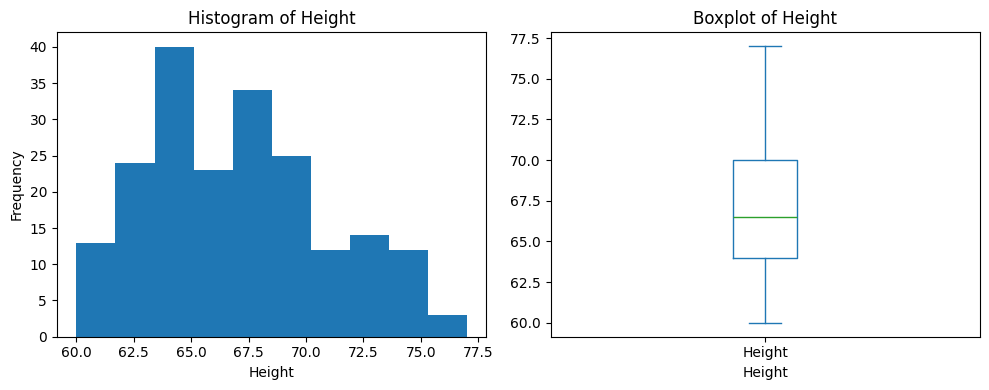

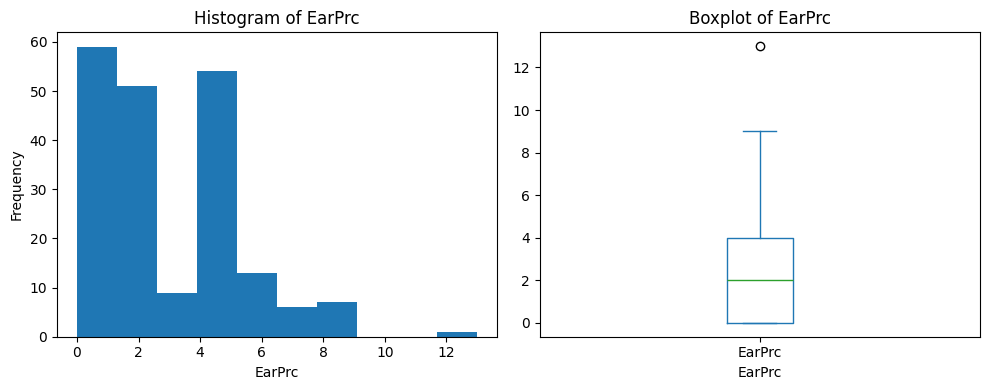

In [33]:
# Plotting histograms and boxplots for quantitative variables
for var in quantitative_vars:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    df[var].plot.hist()
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    df[var].plot.box()
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)

    plt.tight_layout()
    plt.show()


In [11]:
# Calculate mean number of piercings and mean height for each group based on "Tattoo" status
mean_stats = df.groupby('Tattoo').agg({'EarPrc': 'mean', 'Height': 'mean'})

# Display the mean statistics
print("Mean Statistics Stratified by Tattoo Status:")
print(mean_stats)


Mean Statistics Stratified by Tattoo Status:
          EarPrc     Height
Tattoo                     
No      2.576471  66.869118
Yes     4.033333  67.933333


In [12]:
# Calculate total number of piercings and average number of piercings per "CD" group
earprc_stats = df.groupby('CDs').agg({'EarPrc': ['sum', 'mean']})

# Rename the columns for clarity
earprc_stats.columns = ['Total EarPrc', 'Average EarPrc']

# Display the statistics
print("Stratified Analysis of EarPrc by CDs:")
print(earprc_stats)


Stratified Analysis of EarPrc by CDs:
          Total EarPrc  Average EarPrc
CDs                                   
AboveAvg           136        2.344828
Average            201        2.913043
BelowAvg           222        3.041096


In [13]:
# Create a contingency table of Tattoo by CDs
contingency_table = pd.crosstab(df['Tattoo'], df['CDs'], margins=True)

# Calculate row percentages
row_percentages = contingency_table.div(contingency_table['All'], axis=0) * 100

# Calculate column percentages
column_percentages = contingency_table.div(contingency_table.loc['All'], axis=1) * 100

# Calculate total percentage
total_percentage = contingency_table / contingency_table.loc['All', 'All'] * 100

# Display the contingency table and percentages
print("Contingency Table of Tattoo by CDs:")
print(contingency_table)
print("\nRow Percentages:")
print(row_percentages)
print("\nColumn Percentages:")
print(column_percentages)
print("\nTotal Percentage:")
print(total_percentage)


Contingency Table of Tattoo by CDs:
CDs     AboveAvg  Average  BelowAvg  All
Tattoo                                  
No            48       57        65  170
Yes           10       12         8   30
All           58       69        73  200

Row Percentages:
CDs      AboveAvg    Average   BelowAvg    All
Tattoo                                        
No      28.235294  33.529412  38.235294  100.0
Yes     33.333333  40.000000  26.666667  100.0
All     29.000000  34.500000  36.500000  100.0

Column Percentages:
CDs       AboveAvg     Average    BelowAvg    All
Tattoo                                           
No       82.758621   82.608696   89.041096   85.0
Yes      17.241379   17.391304   10.958904   15.0
All     100.000000  100.000000  100.000000  100.0

Total Percentage:
CDs     AboveAvg  Average  BelowAvg    All
Tattoo                                    
No          24.0     28.5      32.5   85.0
Yes          5.0      6.0       4.0   15.0
All         29.0     34.5      36.5  100.0


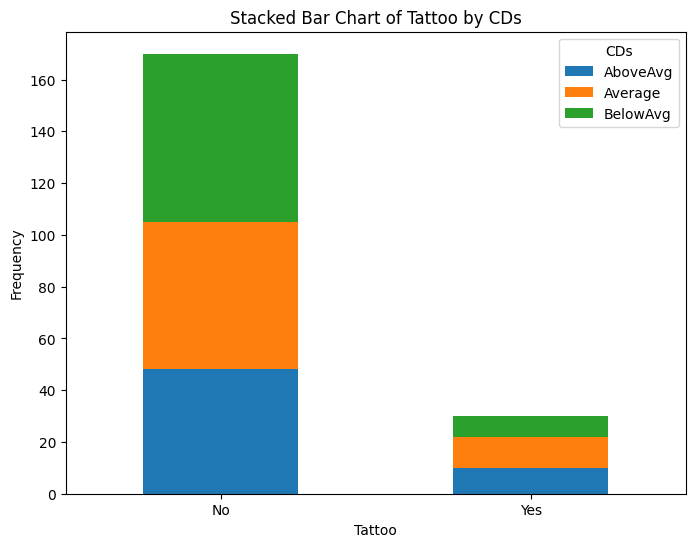

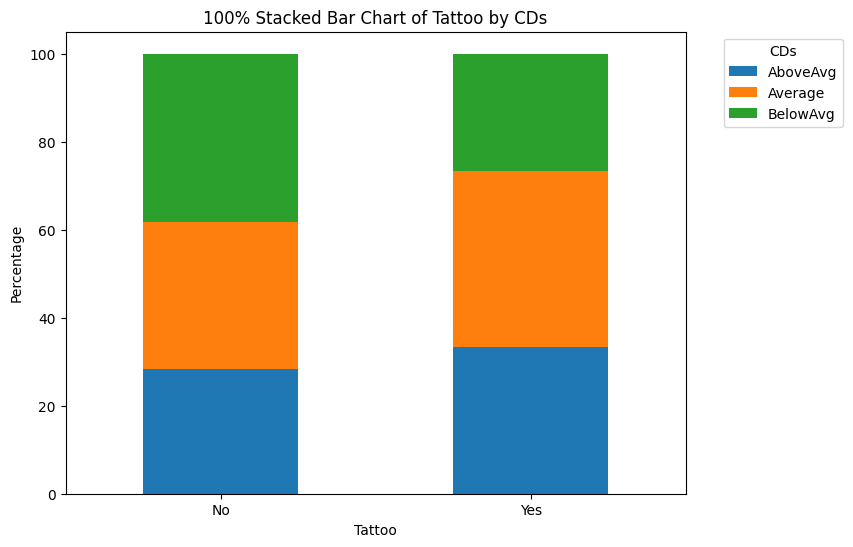

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Frequency counts generated from question 6
contingency_table = pd.crosstab(df['Tattoo'], df['CDs'])

# Stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
contingency_table.plot(kind='bar', stacked=True, ax=ax)
plt.title('Stacked Bar Chart of Tattoo by CDs')
plt.xlabel('Tattoo')
plt.ylabel('Frequency')
plt.legend(title='CDs')
plt.xticks(rotation=0)
plt.show()

# 100% stacked bar chart
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(8, 6))
contingency_table_percentage.plot(kind='bar', stacked=True, ax=ax)
plt.title('100% Stacked Bar Chart of Tattoo by CDs')
plt.xlabel('Tattoo')
plt.ylabel('Percentage')
plt.legend(title='CDs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()


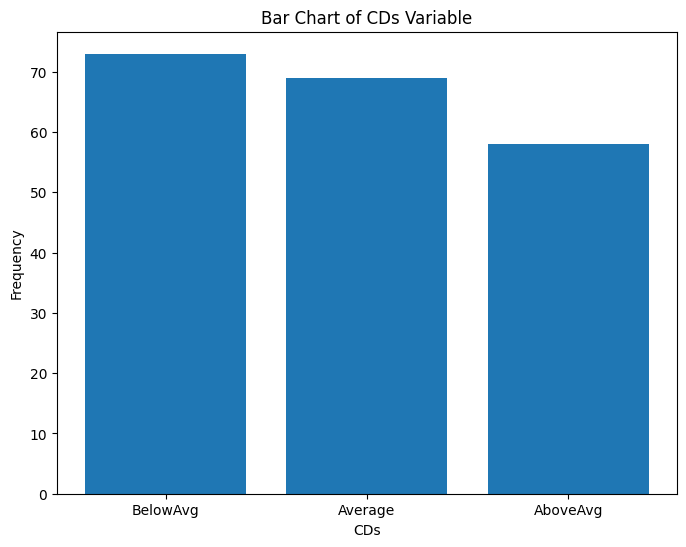

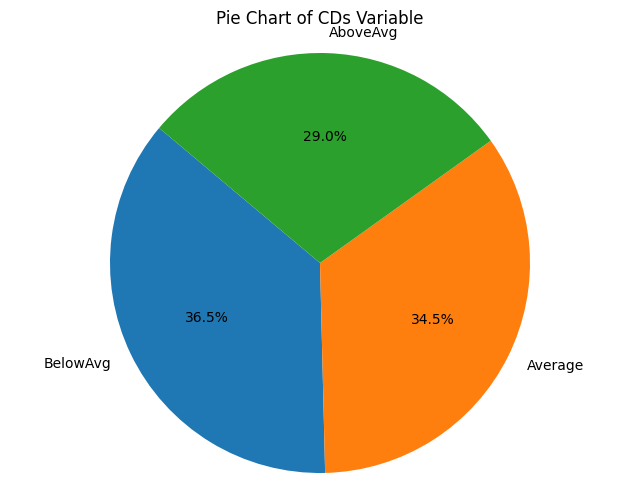

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the "CDs" variable

# Count the frequencies of each category in the "CDs" variable
cds_counts = df['CDs'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(cds_counts.index, cds_counts.values)
plt.title('Bar Chart of CDs Variable')
plt.xlabel('CDs')
plt.ylabel('Frequency')
plt.show()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(cds_counts, labels=cds_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of CDs Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [16]:
import numpy as np

# Assuming df is your DataFrame containing the "Height" variable

# Create a random sample of 60 observations from the dataset
random_sample = df['Height'].sample(n=60, random_state=42)

# Calculate sample mean and sample standard deviation
sample_mean = random_sample.mean()
sample_std = random_sample.std()

# Define confidence levels
confidence_levels = [0.90, 0.95, 0.99]

# Calculate z-scores for each confidence level
z_scores = [round(abs(np.round((1 - cl) / 2, 4)), 2) for cl in confidence_levels]

# Calculate margin of error for each confidence level
margins_of_error = [round(z * sample_std / np.sqrt(len(random_sample)), 2) for z in z_scores]

# Calculate confidence intervals for each confidence level
confidence_intervals = [(round(sample_mean - margin, 2), round(sample_mean + margin, 2)) for margin in margins_of_error]

# Create a table to report the confidence intervals
confidence_intervals_table = pd.DataFrame({
    'Confidence Level': confidence_levels,
    'Z-Score': z_scores,
    'Margin of Error': margins_of_error,
    'Confidence Interval': confidence_intervals
})

# Display the table
print("Confidence Intervals for Height:")
print(confidence_intervals_table)


Confidence Intervals for Height:
   Confidence Level  Z-Score  Margin of Error Confidence Interval
0              0.90     0.05             0.02      (66.47, 66.51)
1              0.95     0.02             0.01       (66.48, 66.5)
2              0.99     0.00             0.00      (66.49, 66.49)


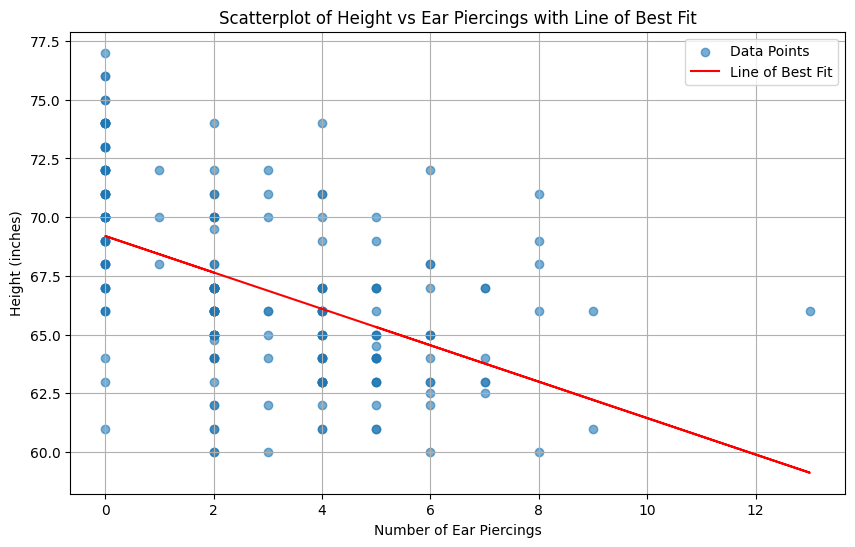

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the "Height" and "EarPrc" variables

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['EarPrc'], df['Height'], alpha=0.6, label='Data Points')

# Line of best fit
m, b = np.polyfit(df['EarPrc'], df['Height'], 1)
plt.plot(df['EarPrc'], m * df['EarPrc'] + b, color='red', label='Line of Best Fit')

# Adding labels and title
plt.title('Scatterplot of Height vs Ear Piercings with Line of Best Fit')
plt.xlabel('Number of Ear Piercings')
plt.ylabel('Height (inches)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()
